In [1]:
# フォントの設定
import matplotlib as mpl
font = {"family":"IPAexGothic"}
mpl.rc('font', **font)
%matplotlib inline

#計算&表の編集ツール
import pandas as pd
import numpy as np

# 可視化ツール
import matplotlib.pyplot as plt
import matplotlib
matplotlib.font_manager._rebuild()

# 分類するためのツール
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier as Deeplearning

#　その他
import warnings
warnings.filterwarnings('ignore')

## 【課題1】データの取得
PandasのDataFrame型変数xに格納してください。

In [2]:
# アヤメのデータセットとデータ分割プログラム
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# データセットを読み込み
iris = load_iris()

# 特徴量を抽出
X = pd.DataFrame(iris.data, columns=[
     "Sepal length"
    ,"Sepal width"
    ,"Petal length"
    ,"Petal width"
])

# ターゲットを種類に設定
y = pd.DataFrame(iris.target, columns = ["Species"])  

## 【課題2】データの結合
x,yを結合させたDataFrame型変数dfを作成してください。

In [3]:
df = X.join(y)

## 【課題3】データの確認
1. 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
2. ラベルごとのサンプル数の合計を出力する。
3. 特徴量に欠損値があるかを確認する。
4. 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [4]:
# 先頭から任意行を抽出
df.head(4)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [5]:
# 項目別合計を算出
df.sum()

Sepal length    876.5
Sepal width     458.6
Petal length    563.7
Petal width     179.9
Species         150.0
dtype: float64

In [6]:
# 欠損値を確認（Falseは欠損ではない）
df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64

In [7]:
# 各種統計量を表示
df.describe() 

,Sepal length,Sepal width,Petal length,Petal width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【課題4】irisデータセット自体の調査

【課題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。

1. sepal_widthの列を３つの異なる方法で抽出する
2. 50番目から99番目までのデータを抽出する
3. petal_lengthの列の50番目から99番目までのデータを抽出する
4. petal_widthの値が0.2のデータを抽出する

In [8]:
# Sepal width
df["Sepal width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: Sepal width, Length: 150, dtype: float64

In [9]:
# Sepal width
df.loc[:, ["Sepal width"]]

,Sepal width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
5,3.9
6,3.4
7,3.4
8,2.9
9,3.1


In [10]:
# Sepal width
df.iloc[:, [1]]

,Sepal width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
5,3.9
6,3.4
7,3.4
8,2.9
9,3.1


loc は 行、列をラベルで指定します。
iloc は 行、列をインデックス番号で指定します。

In [11]:
# 行数指定で抽出
df[50:99]

,Sepal length,Sepal width,Petal length,Petal width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [12]:
# 条件指定で抽出
df[df['Petal width'] == 0.2]

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


【課題6】図の作成
データは可視化して確認することが大切です。図を作成していきましょう。Matplotlibやseabornを使ってください。

1. ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
2. boxplotを使いデータの分布を可視化する
3. violinplotを使いデータの分布を可視化する

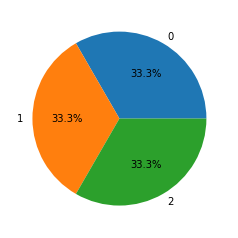

In [13]:
# 種別を項目に設定
label = df["Species"].unique()

# 種別ごとのデータ量でグルーピング
x = df.groupby("Species").size()

# 円グラフの作成
plt.pie(x, labels=label, autopct="%.1f%%")

# グラフ表示
plt.show()

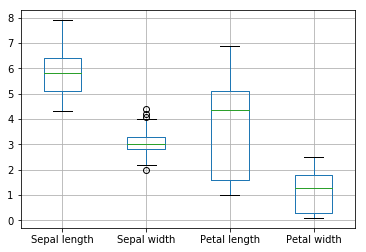

In [14]:
# 2 Sepal length	Sepal width	Petal length	Petal width	
df.boxplot(column=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])

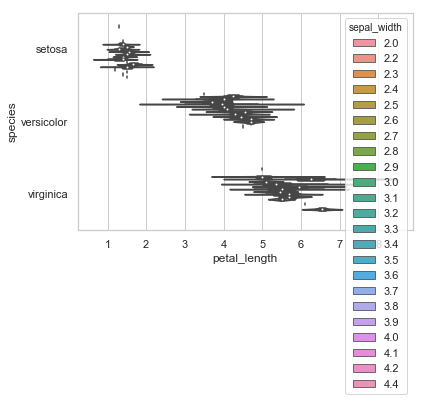

In [15]:
# 3
import seaborn as sns
sns.set(style="whitegrid")
iris = sns.load_dataset("iris")
ax = sns.violinplot(x=iris["petal_length"], y=iris["species"], hue=iris["sepal_width"])

violinplotを使うとバイオリン図を描画することができます。  
箱ひげ図と異なり、バイオリン図は異なる値のデータに確率密度を表示することができる。

【課題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。

1. 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
2. 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
3. ４つの特徴量に関する相関係数行列を作る
4. 相関係数行列のヒートマップを作る

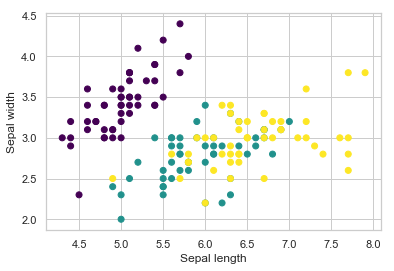

In [16]:
# 1
plt.scatter(
     df["Sepal length"]
    ,df["Sepal width"]
    ,c=df["Species"]
    ,cmap="viridis"
)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.show()

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


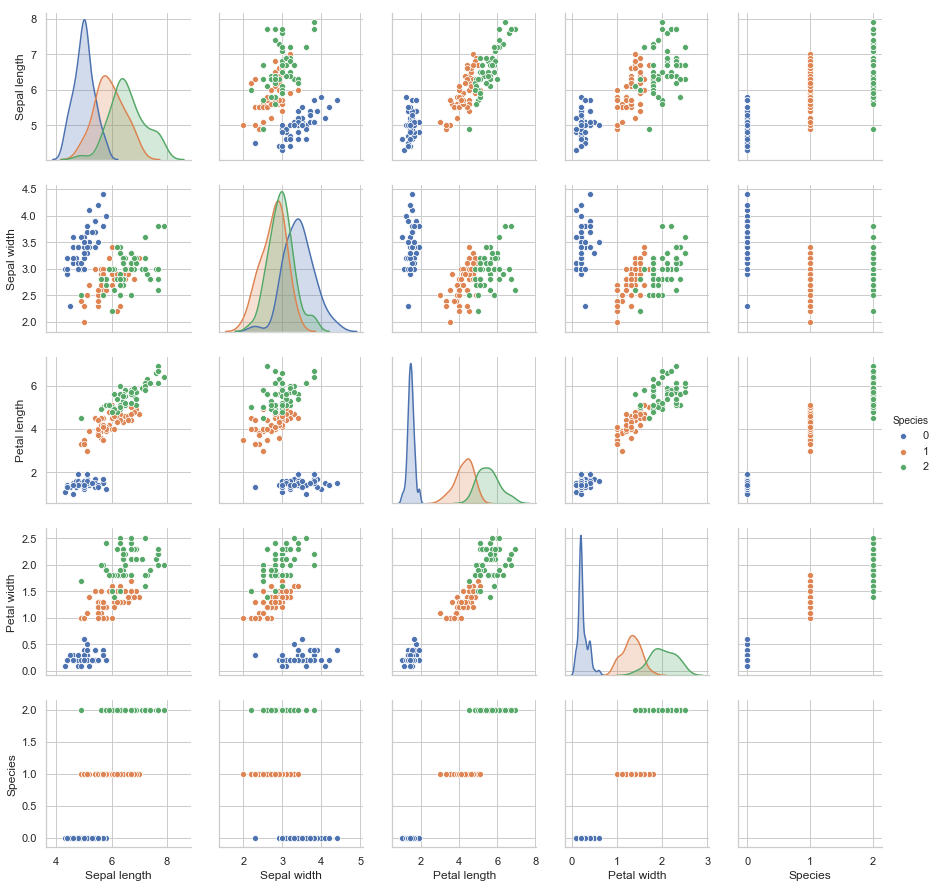

In [17]:
# 2
sns.pairplot(df, hue="Species", size=2.5)

plt.show()

In [18]:
# 3
corr_mat = df.corr(method='pearson')
print(corr_mat)

              Sepal length  Sepal width  Petal length  Petal width   Species
Sepal length      1.000000    -0.117570      0.871754     0.817941  0.782561
Sepal width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
Petal length      0.871754    -0.428440      1.000000     0.962865  0.949035
Petal width       0.817941    -0.366126      0.962865     1.000000  0.956547
Species           0.782561    -0.426658      0.949035     0.956547  1.000000


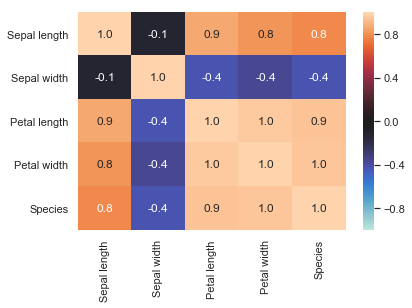

In [19]:
# 4
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True,
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )

plt.show()

# 【課題8】簡単な考察
散布図行列を見ながら、3種類の花はどういう風に分けられそうかを簡単に考えて説明

アヤメの種類は、乱暴に解釈すると下記のように分類ができると言えます。  
Petal widthで100%分類ができそう。  
Petal length では 90%の精度で分類ができそう。  
Sepal length では 80%の精度で分類ができそう。  